# Adaptive networks

In [64]:
import networkx as nx
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt

rc('font',**{'family':'serif','serif':['Computer Modern'],'size': 18})
rc('text', usetex=True)
import random as rn

In [17]:
def make_animation(draw_function, frames, interval, filename=None,
                   verbose=False, figure_params=None):
    from matplotlib import pyplot, animation
    from IPython.display import HTML, display, clear_output
    import random

    if filename is None:
        filename = 'animate_%06i.gif' % rn.randint(0, 999999)
    # Create figure
    if figure_params is None:
        figure_params = {}
    figure = pyplot.figure(**figure_params)
    # Wrap draw_function if we need to print to console
    if verbose:
        old_draw_function = draw_function
        def draw_function(current_frame_number, total_frame_count):
            old_draw_function(current_frame_number, total_frame_count)
            print('Processed frame', current_frame_number + 1, '/', total_frame_count)
            clear_output(wait=True)
            if current_frame_number + 1 == total_frame_count:
                print('Writing animation to file...')
                clear_output(wait=True)
    # Generate animation
    anim = animation.FuncAnimation(
        figure, draw_function, frames=frames, interval=interval,
        init_func=lambda: None, fargs=(frames,))
    anim.save(filename, writer='imagemagick')
    # Close the animation figure so the last frame does not get displayed
    # in the notebook.
    pyplot.close()
    # Return display object for the animated GIF
    return display(HTML('<img src="' + filename + '">'))

## Adaptive epidemic model

In [29]:
class SisSimulation:

    def __init__(self, p_i=0.5, p_r=0.5, p_s=0.5, randomize_graph=0.0):
        
        self.p_i = p_i  # infection probability
        self.p_r = p_r  # recovery probability
        self.p_s = p_s  # severance probability
        self.randomize_graph = randomize_graph

    def initialize(self):
        self.graph = nx.connected_watts_strogatz_graph(50, 4, self.randomize_graph)
        self.graph_layout = nx.spring_layout(self.graph)
        for i in self.graph.nodes:
            self.graph.nodes[i]['infected'] = (
                1 if rn.uniform(0, 1) < 0.5 else 0)
        self.time = 0
        self.density_history = []

    def observe(self):
        plt.cla()
        plt.subplot(1, 2, 1)
        nx.draw(
            self.graph, vmin = 0, vmax = 1,
            node_color = [self.graph.nodes[i]['infected'] for i in self.graph.nodes],
            cmap = 'bwr',
            pos = self.graph_layout)
        plt.title('Step: ' + str(self.time))
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(self.density_history) + 1), self.density_history)
        plt.ylim(0, 1)
        plt.title('Proportion of population infected')
        plt.show()

    def update(self):
        for _ in range(100):
            a = rn.choice(list(self.graph.nodes))
            if self.graph.nodes[a]['infected'] == 0:  # if susceptible
                if self.graph.degree(a) > 0:
                    b = rn.choice(list(self.graph.neighbors(a)))
                    if self.graph.nodes[b]['infected'] == 1:  # if neighbor b is infected
                        if rn.random() < self.p_s: self.graph.remove_edge(a, b)
                        else: self.graph.nodes[a]['infected'] = 1 if rn.uniform(0, 1) < self.p_i else 0
            else:  # if infected
                self.graph.nodes[a]['infected'] = 0 if rn.uniform(0, 1) < self.p_r else 1
                    
            self.time += 1
            self.density_history.append(sum(self.graph.nodes[i]['infected'] 
                                            for i in self.graph.nodes) / len(self.graph.nodes))
        return self.density_history[-1]

In [31]:
graph_randomness = .5        # 0 => not random; 1 => very random; 0.5 => somewhat random.
infection_probability = 0.5  # Probability of one neighbor infecting another
recovery_probability = 0.2   # Probability of recovery
severance_probability = 0.5  # severance probability

sim = SisSimulation(infection_probability, recovery_probability, 
                    severance_probability, graph_randomness)
sim.initialize()

def animate_simulation(frame, total_frames):
    # To speed things up we avoid plotting after every simulation update
    steps_per_frame = 20
    for _ in range(steps_per_frame):
        sim.update()
    sim.observe()

make_animation(
    animate_simulation, frames=10, interval=250,
    figure_params={'figsize': (18, 8)},
    verbose=True)

In [69]:
graph_randomness = .5        # 0 => not random; 1 => very random; 0.5 => somewhat random.
infection_probability = 0.5  # Probability of one neighbor infecting another
recovery_probability = 0.2   # Probability of recovery
severance_probability = 0.25  # severance probability

sim = SisSimulation(infection_probability, recovery_probability, 
                    severance_probability, graph_randomness)
sim.initialize()

def animate_simulation(frame, total_frames):
    # To speed things up we avoid plotting after every simulation update
    steps_per_frame = 20
    for _ in range(steps_per_frame):
        sim.update()
    sim.observe()

make_animation(
    animate_simulation, frames=10, interval=250,
    figure_params={'figsize': (18, 8)},
    verbose=True)

In [70]:
graph_randomness = .5        # 0 => not random; 1 => very random; 0.5 => somewhat random.
infection_probability = 0.5  # Probability of one neighbor infecting another
recovery_probability = 0.2   # Probability of recovery
severance_probability = 0.75  # severance probability

sim = SisSimulation(infection_probability, recovery_probability, 
                    severance_probability, graph_randomness)
sim.initialize()

def animate_simulation(frame, total_frames):
    # To speed things up we avoid plotting after every simulation update
    steps_per_frame = 20
    for _ in range(steps_per_frame):
        sim.update()
    sim.observe()

make_animation(
    animate_simulation, frames=10, interval=250,
    figure_params={'figsize': (18, 8)},
    verbose=True)

## Adaptive diffusion model

In [40]:
print(dict(nx.karate_club_graph().nodes))

{0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}}


In [58]:
def initialize():
    global g, nextg
    g = nx.karate_club_graph()
    for i, j in g.edges:
        g.edges[i,j]['weight'] = 0.5
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if g.nodes[i]['club'] == 'Mr. Hi' else 0
    nextg = g.copy()
    nextg.pos = g.pos = nx.spring_layout(g)

def observe():
    global g, nextg
    #plt.figure(figsize=(7, 5))
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            edge_cmap = cm.binary, edge_vmin = 0, edge_vmax = 1,
            edge_color = [g.edges[i,j]['weight'] for i, j in g.edges],
            pos = g.pos)
    #plt.show()
    
alpha = 1 # diffusion constant
beta = 3  # rate of adaptive edge weight change
gamma = 3 # pickiness of nodes
Dt = 0.01 # Delta t

def update():
    global g, nextg
    for i in g.nodes:
        ci = g.nodes[i]['state']
        nextg.nodes[i]['state'] = ci + alpha * ( \
            sum((g.nodes[j]['state'] - ci) * g.edges[i,j]['weight']
                for j in g.neighbors(i))) * Dt
    for i, j in g.edges:
        wij = g.edges[i,j]['weight']
        nextg.edges[i,j]['weight'] = wij + beta * wij * (1 - wij) * ( \
            1 - gamma * abs(g.nodes[i]['state'] - g.nodes[j]['state'])
            ) * Dt
    nextg.pos = nx.spring_layout(nextg, pos = g.pos, iterations = 5)
    g, nextg = nextg, g

C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


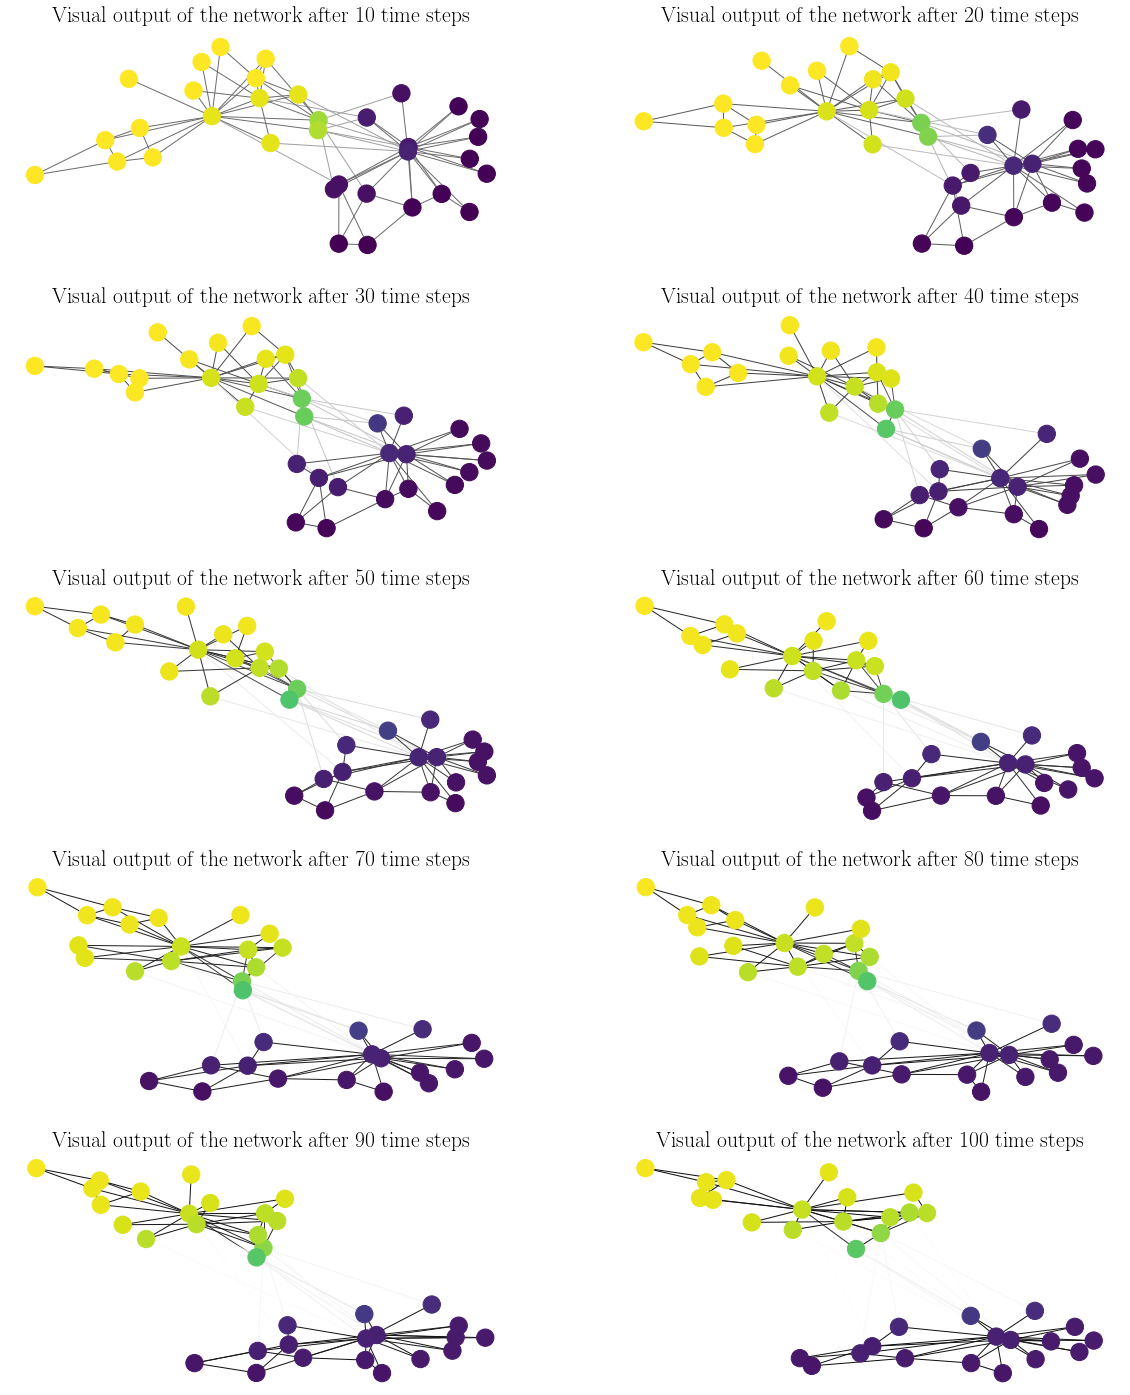

In [66]:
plt.figure(figsize=(20, 25))
initialize()
for i in range(1, 101):
    update()
    if i%10 == 0:
        plt.subplot(5, 2, i/10)
        plt.title("Visual output of the network after {} time steps".format(i))
        observe()
plt.show()

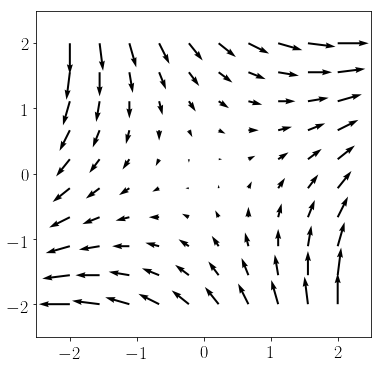

In [74]:
import numpy as np
import matplotlib.pyplot as plt
x = y = np.linspace(-2, 2, 10)   #[-2, -1, 0, 1, 2])
x_grid, y_grid = np.meshgrid(x, y)
vector_x = x_grid + y_grid
vector_y = x_grid - y_grid
plt.figure(figsize=(6, 6))
plt.quiver(x_grid, y_grid, vector_x, vector_y)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

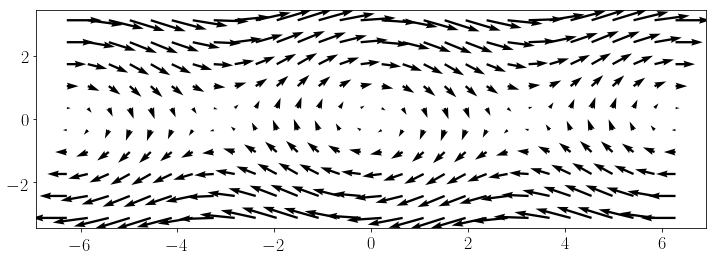

In [76]:
import numpy as np
import matplotlib.pyplot as plt
# Create grid coordinates
x = np.linspace(-2 * np.pi, 2 * np.pi, 30)
y = np.linspace(-np.pi, np.pi, 10)
x_grid, y_grid = np.meshgrid(x, y)
# Compute vector field
vector_x = y_grid
vector_y = -np.sin(x_grid)
# Plot vector field
plt.figure(figsize=(12, 4))
plt.quiver(x_grid, y_grid, vector_x, vector_y)
plt.show()